# Random Forest Classification

Fitting the best fit random forest model to the dataset of social network ads and classify the customers in two groups (whether they buy the car or not) and predict whether the new customer will buy the car or not based on their age and estimated salary.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
dataset = pd.read_csv('Data_set/Social_Network_Ads.csv')
X = dataset.iloc[:, 2:4].values
Y = dataset.iloc[:, 4].values

### Splitting the dataset

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Feature scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Fitting the model

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

### Predicting the test set results

In [6]:
Y_pred = classifier.predict(X_test)

### Creating the confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[63,  5],
       [ 3, 29]], dtype=int64)

### Visualizing the training set results 

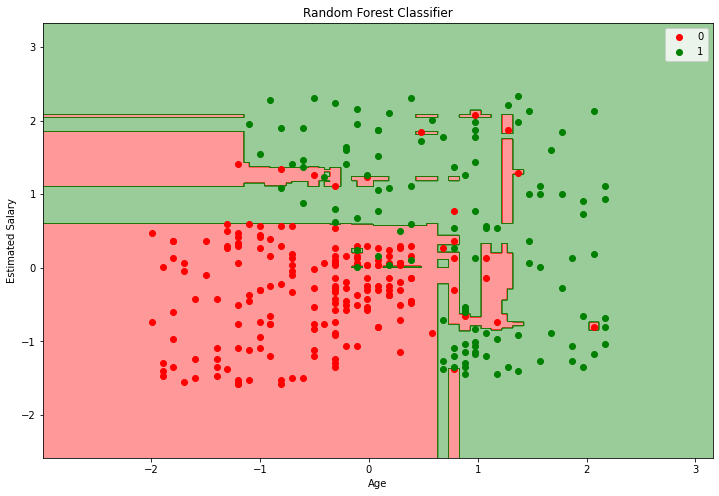

In [9]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
plt.figure(figsize = (12, 8))
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.4,
            cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

from matplotlib.axes._axes import _log
_log.setLevel('ERROR')

plt.show()

### Visualizing the test set results

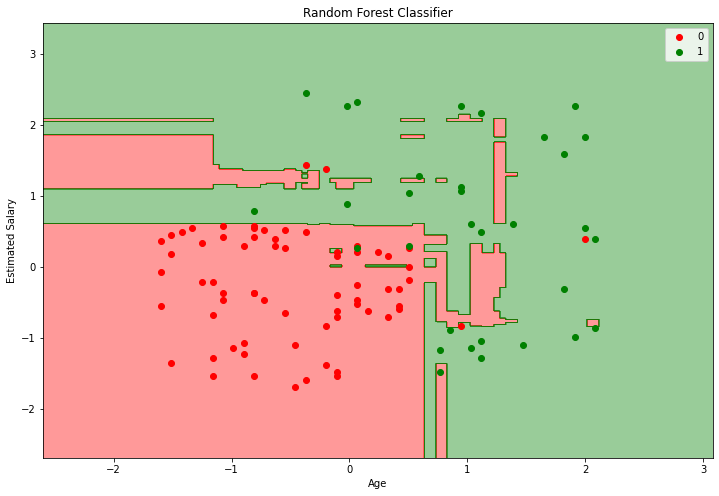

In [10]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
plt.figure(figsize = (12, 8))
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.4,
            cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

from matplotlib.axes._axes import _log
_log.setLevel('ERROR')

plt.show()